# Bank Customer Churn Analysis

PHASE 1: FOUNDATION & DATA *EXPLORATION*



**Step 1: Environment Setup & Data** **Loading**

In [25]:
#Setting up our data science environment
# Install and import required packages
!pip install ipywidgets -q
#Data manipulation libraries
import pandas as pd   #the backbone of data analysis
import numpy as np    #numerical computations and array operations

#Visualization libraries
import matplotlib.pyplot as plt    #basic plotting fuctionality
import seaborn as sns              #Beautiful statisticall visualizations
import plotly.express as px        #Interactive visualizations for dashboards
import plotly.graph_objects as go  #Advanced plotly customizations

#For building dashboard
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output

import os

#Dataset
import kagglehub #direct access to kaggle datasets

#warnings; to keep our outputs clean
import warnings
warnings.filterwarnings('ignore')

#visualization style for better looking plots
plt.style.use('default')
sns.set_palette('husl')

# Configure pandas display options for better data viewing
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', None)          # Don't wrap columns
pd.set_option('display.max_colwidth', 50)     # Limit column width for readability


**STEP 2: Loading and First Look at Our Banking Data**

In [26]:
#Loading/ downloading dataset from kaggle
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")
print("Dataset downloaded to:", path)

#check the files that were downloaded in the folder
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"CSV files in the folder: {csv_files}")

Using Colab cache for faster access to the 'bank-customer-churn' dataset.
Dataset downloaded to: /kaggle/input/bank-customer-churn
CSV files in the folder: ['Customer-Churn-Records.csv']


In [27]:
#load dataset file
df = pd.read_csv(os.path.join(path, csv_files[0]))
df.head()   #we look at the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**Step 3: Dataset size investigation**

In [28]:
# Dataset dimensions and basic info
rows, columns = df.shape
print(f"Total customer rows:, {rows}")
print(f"Total columns:, {columns}")

memory_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"Total memory usage:,{memory_mb:.2f}")

Total customer rows:, 10000
Total columns:, 18
Total memory usage:,3.16


**STEP 4: Data Types & Quality Assessment**

In [29]:
# Data types and basic info
print("Data Info: ")
df.info()

#Missing values check
missing_summary = df.isnull().sum()
print(f"\nMissing Values:\n{missing_summary[missing_summary > 0]}")

#Duplicates check
print(f"\n Duplicate Values: {df.duplicated().sum()}")

#key Statistics
key_cols = ['CreditScore', 'Balance', 'Complain', 'Satisfaction Score']
print(f"\nKey Variables Summary:")
df[key_cols].describe()

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64 

,CreditScore,Balance,Complain,Satisfaction Score
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,0.204400,3.013800
std,96.653299,62397.405202,0.403283,1.405919
min,350.000000,0.000000,0.000000,1.000000
25%,584.000000,0.000000,0.000000,2.000000
50%,652.000000,97198.540000,0.000000,3.000000
75%,718.000000,127644.240000,0.000000,4.000000
max,850.000000,250898.090000,1.000000,5.000000


Churn Rate: 20.4%
Distribution:
Exited
0    7962
1    2038
Name: count, dtype: int64


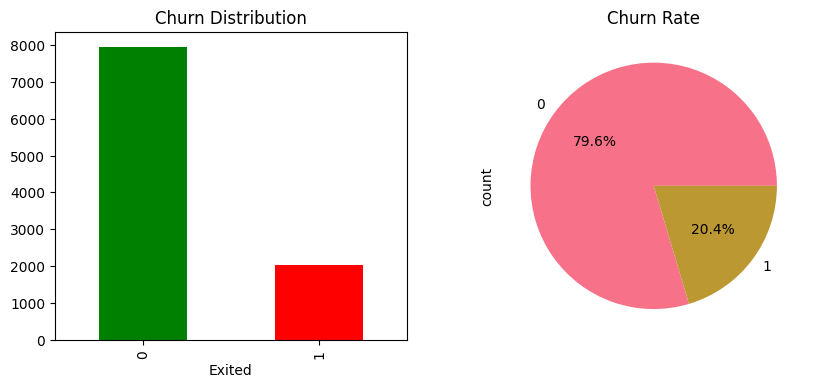

Balance at risk: 24.3%


In [30]:
# Basic churn metrics
churn_rate = df['Exited'].mean() * 100
churn_counts = df['Exited'].value_counts()

print(f"Churn Rate: {churn_rate:.1f}%")
print(f"Distribution:\n{churn_counts}")

# Visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')

plt.subplot(1, 2, 2)
churn_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()

# Business impact
lost_balance = df[df['Exited']==1]['Balance'].sum()
total_balance = df['Balance'].sum()
print(f"Balance at risk: {(lost_balance/total_balance)*100:.1f}%")

**STEP 5: CHURN PREDICTION ANALYSIS**

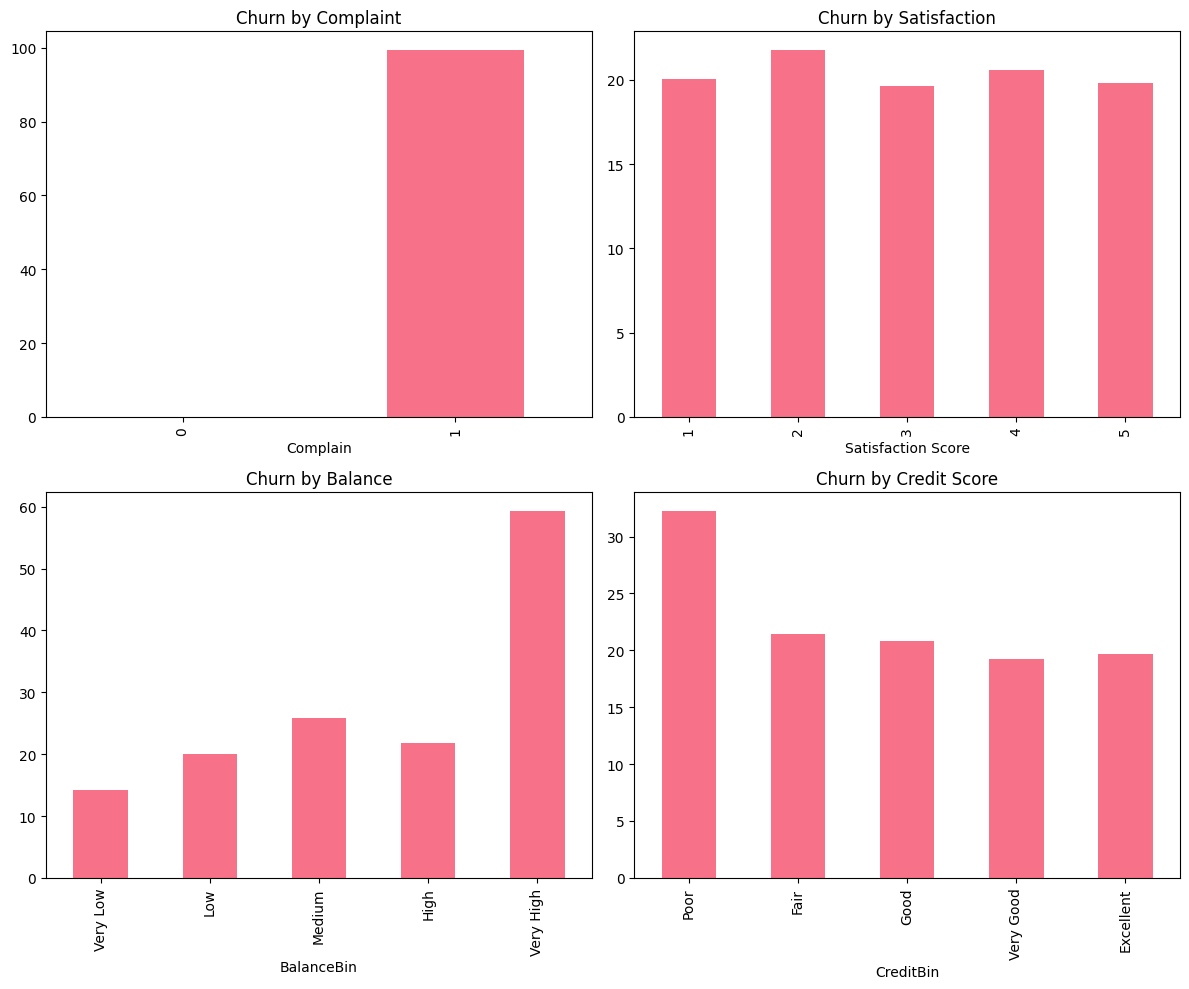

Key Findings:
Complaint churn rates: {0: 0.050276520864756154, 1: 99.51076320939335}
Satisfaction patterns: {1: 20.031055900621116, 2: 21.7974180734856, 3: 19.637610186092065, 4: 20.617529880478088, 5: 19.810379241516966}


In [31]:
# Analyze key predictors
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Complain analysis
complain_churn = df.groupby('Complain')['Exited'].mean() * 100
complain_churn.plot(kind='bar', ax=axes[0,0], title='Churn by Complaint')

# Satisfaction analysis
satisfaction_churn = df.groupby('Satisfaction Score')['Exited'].mean() * 100
satisfaction_churn.plot(kind='bar', ax=axes[0,1], title='Churn by Satisfaction')

# Balance analysis
df['BalanceBin'] = pd.cut(df['Balance'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
balance_churn = df.groupby('BalanceBin')['Exited'].mean() * 100
balance_churn.plot(kind='bar', ax=axes[1,0], title='Churn by Balance')

# Credit score analysis
df['CreditBin'] = pd.cut(df['CreditScore'], bins=5, labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
credit_churn = df.groupby('CreditBin')['Exited'].mean() * 100
credit_churn.plot(kind='bar', ax=axes[1,1], title='Churn by Credit Score')

plt.tight_layout()
plt.show()

# Print key insights
print("Key Findings:")
print(f"Complaint churn rates: {complain_churn.to_dict()}")
print(f"Satisfaction patterns: {satisfaction_churn.to_dict()}")

**ADDING 6 MORE VARIABLES TO YOUR EXISTING ANALYSIS**

EXTENDED CHURN ANALYSIS - 6 ADDITIONAL FACTORS

PRODUCTS PORTFOLIO ANALYSIS:
----------------------------------------
1 Product(s): 5,084 customers, 27.7% churn
2 Product(s): 4,590 customers, 7.6% churn
3 Product(s): 266 customers, 82.7% churn
4 Product(s): 60 customers, 100.0% churn

ACTIVITY STATUS ANALYSIS:
----------------------------------------
Inactive: 4,849 customers, 26.9% churn
Active: 5,151 customers, 14.3% churn

TENURE (RELATIONSHIP LENGTH) ANALYSIS:
----------------------------------------
New (0-2yr): 2,083 customers, 20.8% churn
Growing (2-4yr): 1,998 customers, 20.8% churn
Stable (4-6yr): 1,979 customers, 20.5% churn
Mature (6-8yr): 2,053 customers, 18.2% churn
Loyal (8+yr): 1,474 customers, 21.4% churn

AGE GROUP ANALYSIS:
----------------------------------------
Young (18-30): 1,946 customers, 7.5% churn
Adult (30-40): 4,451 customers, 12.1% churn
Middle (40-50): 2,320 customers, 34.0% churn
Mature (50-60): 797 customers, 56.2% churn
Senior (60+): 464 customers, 24.

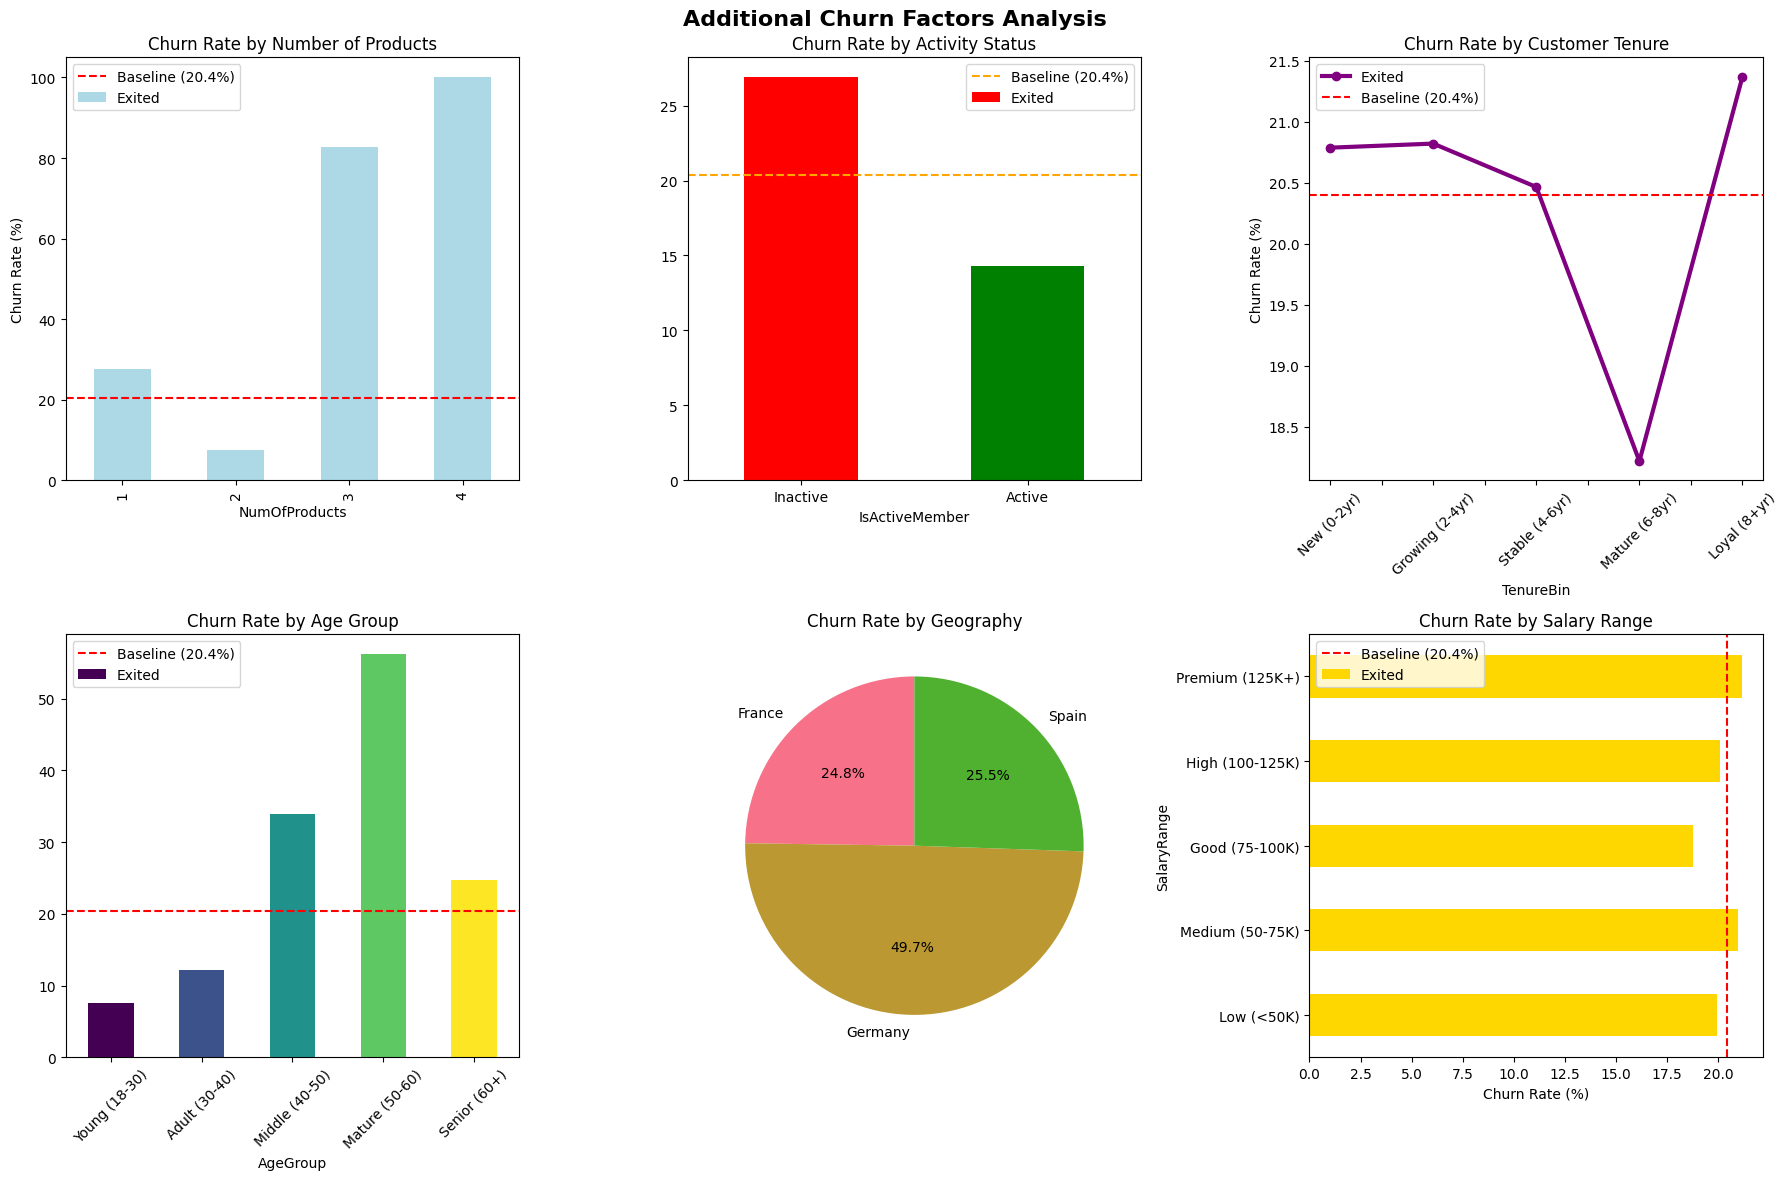


COMPLETE CHURN FACTOR POWER RANKING
 1. Complaints             99.5% range GAME CHANGER
 2. NumOfProducts          92.4% range GAME CHANGER
 3. AgeGroup               48.7% range EXTREMELY STRONG
 4. Balance                45.1% range EXTREMELY STRONG
 5. Geography              16.3% range STRONG
 6. CreditScore            13.0% range STRONG
 7. IsActiveMember         12.6% range STRONG
 8. TenureBin               3.2% range MODERATE
 9. SalaryRange             2.4% range MODERATE
10. Satisfaction Score      2.2% range MODERATE


In [32]:

print("EXTENDED CHURN ANALYSIS - 6 ADDITIONAL FACTORS")

# Create figure for the 6 new variables (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Additional Churn Factors Analysis', fontsize=16, fontweight='bold')

# 5. NumOfProducts Analysis
print("\nPRODUCTS PORTFOLIO ANALYSIS:")
print("-" * 40)
products_churn = df.groupby('NumOfProducts')['Exited'].mean() * 100
products_count = df.groupby('NumOfProducts')['Exited'].count()

for products, churn_rate in products_churn.items():
    count = products_count[products]
    print(f"{products} Product(s): {count:,} customers, {churn_rate:.1f}% churn")

# Plot - Stacked bar showing count + churn rate
ax1 = axes[0,0]
products_churn.plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Churn Rate by Number of Products')
ax1.axhline(y=20.4, color='red', linestyle='--', label='Baseline (20.4%)') # Corrected baseline
ax1.set_ylabel('Churn Rate (%)')
ax1.legend()

# 6. IsActiveMember Analysis
print("\nACTIVITY STATUS ANALYSIS:")
print("-" * 40)
activity_churn = df.groupby('IsActiveMember')['Exited'].mean() * 100
activity_count = df.groupby('IsActiveMember')['Exited'].count()

for active, churn_rate in activity_churn.items():
    status = "Active" if active == 1 else "Inactive"
    count = activity_count[active]
    print(f"{status}: {count:,} customers, {churn_rate:.1f}% churn")

# Plot - Different colors for active vs inactive
ax2 = axes[0,1]
colors = ['red', 'green']  # Red for inactive, green for active
activity_churn.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Churn Rate by Activity Status')
ax2.axhline(y=20.4, color='orange', linestyle='--', label='Baseline (20.4%)') # Corrected baseline
ax2.set_xticklabels(['Inactive', 'Active'], rotation=0)
ax2.legend()

# 7. Tenure Analysis (Time-based)
print("\nTENURE (RELATIONSHIP LENGTH) ANALYSIS:")
print("-" * 40)
# Create tenure bins
df['TenureBin'] = pd.cut(df['Tenure'],
                        bins=[0, 2, 4, 6, 8, 11],
                        labels=['New (0-2yr)', 'Growing (2-4yr)', 'Stable (4-6yr)', 'Mature (6-8yr)', 'Loyal (8+yr)'])

tenure_churn = df.groupby('TenureBin')['Exited'].mean() * 100
tenure_count = df.groupby('TenureBin')['Exited'].count()

for tenure, churn_rate in tenure_churn.items():
    count = tenure_count[tenure]
    print(f"{tenure}: {count:,} customers, {churn_rate:.1f}% churn")

# Plot - Line chart to show progression over time
ax3 = axes[0,2]
tenure_churn.plot(kind='line', ax=ax3, color='purple', marker='o', linewidth=3)
ax3.set_title('Churn Rate by Customer Tenure')
ax3.axhline(y=20.4, color='red', linestyle='--', label='Baseline (20.4%)') # Corrected baseline
ax3.set_ylabel('Churn Rate (%)')
ax3.legend()
ax3.tick_params(axis='x', rotation=45)

# 8. Age Analysis (Demographics)
print("\nAGE GROUP ANALYSIS:")
print("-" * 40)
df['AgeGroup'] = pd.cut(df['Age'],
                       bins=[18, 30, 40, 50, 60, 100],
                       labels=['Young (18-30)', 'Adult (30-40)', 'Middle (40-50)', 'Mature (50-60)', 'Senior (60+)'])

age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100
age_count = df.groupby('AgeGroup')['Exited'].count()

for age_group, churn_rate in age_churn.items():
    count = age_count[age_group]
    print(f"{age_group}: {count:,} customers, {churn_rate:.1f}% churn")

# Plot - Gradient colors by age
ax4 = axes[1,0]
# Use a list of colors instead of a colormap
age_colors = plt.cm.viridis(np.linspace(0, 1, len(age_churn)))
age_churn.plot(kind='bar', ax=ax4, color=age_colors)
ax4.set_title('Churn Rate by Age Group')
ax4.axhline(y=20.4, color='red', linestyle='--', label='Baseline (20.4%)') # Corrected baseline
ax4.legend()
ax4.tick_params(axis='x', rotation=45)

# 9. Geography Analysis
print("\nGEOGRAPHIC ANALYSIS:")
print("-" * 40)
geo_churn = df.groupby('Geography')['Exited'].mean() * 100
geo_count = df.groupby('Geography')['Exited'].count()

for country, churn_rate in geo_churn.items():
    count = geo_count[country]
    print(f"{country}: {count:,} customers, {churn_rate:.1f}% churn")

# Plot - Pie chart for geographic distribution
ax5 = axes[1,1]
geo_churn.plot(kind='pie', ax=ax5, autopct='%1.1f%%', startangle=90)
ax5.set_title('Churn Rate by Geography')
ax5.set_ylabel('')  # Remove default ylabel for pie chart

# 10. Salary Analysis
print("\nSALARY RANGE ANALYSIS:")
print("-" * 40)
df['SalaryRange'] = pd.cut(df['EstimatedSalary'],
                          bins=[0, 50000, 75000, 100000, 125000, 200000],
                          labels=['Low (<50K)', 'Medium (50-75K)', 'Good (75-100K)', 'High (100-125K)', 'Premium (125K+)'])

salary_churn = df.groupby('SalaryRange')['Exited'].mean() * 100
salary_count = df.groupby('SalaryRange')['Exited'].count()

for salary_range, churn_rate in salary_churn.items():
    count = salary_count[salary_range]
    print(f"{salary_range}: {count:,} customers, {churn_rate:.1f}% churn")

# Plot - Horizontal bar chart for salary ranges
ax6 = axes[1,2]
salary_churn.plot(kind='barh', ax=ax6, color='gold')
ax6.set_title('Churn Rate by Salary Range')
ax6.axvline(x=20.4, color='red', linestyle='--', label='Baseline (20.4%)') # Corrected baseline
ax6.set_xlabel('Churn Rate (%)')
ax6.legend()

plt.tight_layout()
plt.show()

# POWER RANKING OF ALL 10 FACTORS
print("\n" + "="*60)
print("COMPLETE CHURN FACTOR POWER RANKING")
print("="*60)

all_factors = {
    'Complaints': abs(df.groupby('Complain')['Exited'].mean().max() - df.groupby('Complain')['Exited'].mean().min()) * 100,
    'NumOfProducts': abs(df.groupby('NumOfProducts')['Exited'].mean().max() - df.groupby('NumOfProducts')['Exited'].mean().min()) * 100,
    'IsActiveMember': abs(df.groupby('IsActiveMember')['Exited'].mean().max() - df.groupby('IsActiveMember')['Exited'].mean().min()) * 100,
    'Geography': abs(df.groupby('Geography')['Exited'].mean().max() - df.groupby('Geography')['Exited'].mean().min()) * 100,
    'Satisfaction Score': abs(df.groupby('Satisfaction Score')['Exited'].mean().max() - df.groupby('Satisfaction Score')['Exited'].mean().min()) * 100, # Corrected column name
    'AgeGroup': abs(df.groupby('AgeGroup')['Exited'].mean().max() - df.groupby('AgeGroup')['Exited'].mean().min()) * 100,
    'TenureBin': abs(df.groupby('TenureBin')['Exited'].mean().max() - df.groupby('TenureBin')['Exited'].mean().min()) * 100,
    'Balance': abs(df.groupby(pd.cut(df['Balance'], bins=5))['Exited'].mean().max() - df.groupby(pd.cut(df['Balance'], bins=5))['Exited'].mean().min()) * 100,
    'CreditScore': abs(df.groupby(pd.cut(df['CreditScore'], bins=5))['Exited'].mean().max() - df.groupby(pd.cut(df['CreditScore'], bins=5))['Exited'].mean().min()) * 100,
    'SalaryRange': abs(df.groupby('SalaryRange')['Exited'].mean().max() - df.groupby('SalaryRange')['Exited'].mean().min()) * 100
}

# Sort and display
sorted_factors = sorted(all_factors.items(), key=lambda x: x[1], reverse=True)

for i, (factor, effect) in enumerate(sorted_factors, 1):
    if effect > 60:
        strength = "GAME CHANGER"
    elif effect > 40:
        strength = "EXTREMELY STRONG"
    elif effect > 20:
        strength = "VERY STRONG"
    elif effect > 10:
        strength = "STRONG"
    else:
        strength = "MODERATE"

    print(f"{i:2d}. {factor:<20} {effect:>6.1f}% range {strength}")


In [33]:
print("Building A Bank Customer Churn Analysis Dashboard")
print("=" * 50)

# Create dashboard function
def create_churn_dashboard():

    # Dashboard header
    header = widgets.HTML(
        value="""
        <div style='background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
                    padding: 20px; border-radius: 10px; margin-bottom: 20px;'>
            <h1 style='color: white; text-align: center; margin: 0;'>
                Bank Customer Churn Analysis Dashboard
            </h1>
            <p style='color: white; text-align: center; margin: 5px 0 0 0;'>
                Interactive Analysis of Customer Churn Predictors
            </p>
        </div>
        """,
        layout=widgets.Layout(width='100%')
    )

    # Create filter widgets
    filters = {
        'variable': widgets.Dropdown(
            options=[
                ('Complaints', 'Complain'),
                ('Satisfaction Score', 'Satisfaction Score'),
                ('Balance Range', 'Balance'),
                ('Credit Score', 'CreditScore'),
                ('Number of Products', 'NumOfProducts'),
                ('Activity Status', 'IsActiveMember'),
                ('Customer Tenure', 'Tenure'),
                ('Age Groups', 'Age'),
                ('Geography', 'Geography'),
                ('Salary Range', 'EstimatedSalary'),
                ('Gender', 'Gender'),
                ('Has Credit Card', 'HasCrCard')
            ],
            value='Complain',
            description='Variable:',
            style={'description_width': '120px'},
            layout=widgets.Layout(width='400px')
        ),

        'chart_type': widgets.Dropdown(
            options=[
                ('Bar Chart', 'bar'),
                ('Line Chart', 'line'),
                ('Pie Chart', 'pie')
            ],
            value='bar',
            description='Chart Type:',
            style={'description_width': '120px'},
            layout=widgets.Layout(width='300px')
        ),

        'show_baseline': widgets.Checkbox(
            value=True,
            description='Show 24.4% Baseline',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='200px')
        )
    }

    # Results output area
    output = widgets.Output()

    # Interactive analysis function
    def analyze_variable(variable, chart_type, show_baseline):
        with output:
            clear_output(wait=True)

            # Create figure
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
            fig.patch.set_facecolor('white')

            # Prepare data based on variable type
            if variable in ['Balance', 'CreditScore', 'Age', 'EstimatedSalary', 'Tenure']:
                # Continuous variables - create bins
                if variable == 'Balance':
                    df_temp = df.copy()
                    df_temp['TempBin'] = pd.cut(df_temp[variable],
                                         bins=[0, 1, 50000, 100000, 150000, 300000],
                                         labels=['Zero', 'Low', 'Medium', 'High', 'Very High'])
                elif variable == 'CreditScore':
                    df_temp = df.copy()
                    df_temp['TempBin'] = pd.cut(df_temp[variable],
                                         bins=[300, 500, 600, 700, 800, 900],
                                         labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
                elif variable == 'Age':
                    df_temp = df.copy()
                    df_temp['TempBin'] = pd.cut(df_temp[variable],
                                         bins=[18, 30, 40, 50, 60, 100],
                                         labels=['Young (18-30)', 'Adult (30-40)', 'Middle (40-50)', 'Mature (50-60)', 'Senior (60+)'])
                elif variable == 'EstimatedSalary':
                    df_temp = df.copy()
                    df_temp['TempBin'] = pd.cut(df_temp[variable],
                                         bins=[0, 50000, 75000, 100000, 125000, 200000],
                                         labels=['Low', 'Medium', 'Good', 'High', 'Premium'])
                elif variable == 'Tenure':
                    df_temp = df.copy()
                    df_temp['TempBin'] = pd.cut(df_temp[variable],
                                         bins=[0, 2, 4, 6, 8, 11],
                                         labels=['New', 'Growing', 'Stable', 'Mature', 'Loyal'])

                analysis_column = 'TempBin'
                analysis_df = df_temp.dropna(subset=[analysis_column])
            else:
                # Categorical variables - use as is
                analysis_column = variable
                analysis_df = df

            # Calculate churn rates
            churn_analysis = analysis_df.groupby(analysis_column)['Exited'].agg(['count', 'sum', 'mean'])
            churn_analysis['churn_rate'] = churn_analysis['mean'] * 100
            churn_analysis['retention_rate'] = 100 - churn_analysis['churn_rate']

            # Remove any NaN entries
            churn_analysis = churn_analysis.dropna()

            # Chart 1: Churn Rate Analysis
            if chart_type == 'bar':
                bars = ax1.bar(range(len(churn_analysis)), churn_analysis['churn_rate'],
                              color='steelblue', alpha=0.7, edgecolor='navy')
                ax1.set_xticks(range(len(churn_analysis)))
                ax1.set_xticklabels(churn_analysis.index, rotation=45, ha='right')

                # Add value labels on bars
                for i, bar in enumerate(bars):
                    height = bar.get_height()
                    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

            elif chart_type == 'line' and len(churn_analysis) > 1:
                ax1.plot(range(len(churn_analysis)), churn_analysis['churn_rate'],
                        marker='o', linewidth=3, markersize=8, color='darkred')
                ax1.set_xticks(range(len(churn_analysis)))
                ax1.set_xticklabels(churn_analysis.index, rotation=45, ha='right')

            elif chart_type == 'pie' and len(churn_analysis) > 1:
                # For pie chart, show churn counts instead of rates
                churn_counts = churn_analysis['sum']
                colors = plt.cm.Set3(range(len(churn_counts)))
                wedges, texts, autotexts = ax1.pie(churn_counts,
                                                   labels=churn_analysis.index,
                                                   autopct='%1.1f%%',
                                                   colors=colors,
                                                   startangle=90)
                ax1.set_title(f'Churn Distribution by {variable}')
            elif chart_type == 'line' and len(churn_analysis) == 1:
                # Fallback to bar for single category
                bars = ax1.bar(range(len(churn_analysis)), churn_analysis['churn_rate'],
                              color='steelblue', alpha=0.7, edgecolor='navy')
                ax1.set_xticks(range(len(churn_analysis)))
                ax1.set_xticklabels(churn_analysis.index, rotation=45, ha='right')

            if chart_type != 'pie':
                ax1.set_title(f'Churn Rate by {variable}', fontsize=14, fontweight='bold')
                ax1.set_ylabel('Churn Rate (%)', fontsize=12)
                ax1.grid(True, alpha=0.3)

                if show_baseline:
                    ax1.axhline(y=24.4, color='red', linestyle='--', linewidth=2,
                               label='Baseline (24.4%)', alpha=0.8)
                    ax1.legend()

            # Chart 2: Customer Count Distribution
            bars2 = ax2.bar(range(len(churn_analysis)), churn_analysis['count'],
                           color='lightgreen', alpha=0.7, edgecolor='darkgreen')
            ax2.set_title(f'Customer Count by {variable}', fontsize=14, fontweight='bold')
            ax2.set_ylabel('Number of Customers', fontsize=12)
            ax2.set_xticks(range(len(churn_analysis)))
            ax2.set_xticklabels(churn_analysis.index, rotation=45, ha='right')
            ax2.grid(True, alpha=0.3)

            # Add value labels
            for i, bar in enumerate(bars2):
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
                         f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

            plt.tight_layout()
            plt.show()

            # Display insights table
            insights_html = f"""
            <div style='background: #f0f8ff; padding: 15px; border-radius: 8px; margin-top: 10px;'>
                <h3 style='color: #2c5282; margin-top: 0;'>Analysis Results for {variable}</h3>
                <table style='width: 100%; border-collapse: collapse;'>
                    <thead>
                        <tr style='background: #2c5282; color: white;'>
                            <th style='padding: 10px; text-align: left; border: 1px solid #ddd;'>Category</th>
                            <th style='padding: 10px; text-align: center; border: 1px solid #ddd;'>Customers</th>
                            <th style='padding: 10px; text-align: center; border: 1px solid #ddd;'>Churn Rate</th>
                            <th style='padding: 10px; text-align: center; border: 1px solid #ddd;'>Risk Level</th>
                        </tr>
                    </thead>
                    <tbody>
            """

            for idx, row in churn_analysis.iterrows():
                churn_rate = row['churn_rate']
                if churn_rate > 40:
                    risk_color = '#ffcccc'
                    risk_level = 'HIGH RISK'
                elif churn_rate > 30:
                    risk_color = '#ffe6cc'
                    risk_level = 'MEDIUM-HIGH'
                elif churn_rate > 20:
                    risk_color = '#ffffcc'
                    risk_level = 'MEDIUM'
                else:
                    risk_color = '#ccffcc'
                    risk_level = 'LOW RISK'

                insights_html += f"""
                        <tr style='background: {risk_color};'>
                            <td style='padding: 8px; border: 1px solid #ddd; font-weight: bold;'>{idx}</td>
                            <td style='padding: 8px; border: 1px solid #ddd; text-align: center;'>{int(row['count']):,}</td>
                            <td style='padding: 8px; border: 1px solid #ddd; text-align: center; font-weight: bold;'>{churn_rate:.1f}%</td>
                            <td style='padding: 8px; border: 1px solid #ddd; text-align: center; font-weight: bold;'>{risk_level}</td>
                        </tr>
                """

            insights_html += """
                    </tbody>
                </table>
            </div>
            """

            display(widgets.HTML(insights_html))

            # Key insights
            max_churn_category = churn_analysis['churn_rate'].idxmax()
            max_churn_rate = churn_analysis['churn_rate'].max()
            min_churn_category = churn_analysis['churn_rate'].idxmin()
            min_churn_rate = churn_analysis['churn_rate'].min()

            key_insights = f"""
            <div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                        padding: 15px; border-radius: 8px; margin-top: 10px; color: white;'>
                <h3 style='margin-top: 0; color: white;'>Key Insights</h3>
                <ul style='list-style-type: none; padding-left: 0;'>
                    <li style='margin: 8px 0;'><strong>Highest Risk:</strong> {max_churn_category} ({max_churn_rate:.1f}% churn)</li>
                    <li style='margin: 8px 0;'><strong>Lowest Risk:</strong> {min_churn_category} ({min_churn_rate:.1f}% churn)</li>
                    <li style='margin: 8px 0;'><strong>Range:</strong> {max_churn_rate - min_churn_rate:.1f} percentage points difference</li>
                    <li style='margin: 8px 0;'><strong>vs Baseline:</strong> {max_churn_rate - 24.4:.1f}% above average for highest risk group</li>
                </ul>
            </div>
            """

            display(widgets.HTML(key_insights))

    # Create interactive widget
    interactive_plot = interactive(analyze_variable,
                                 variable=filters['variable'],
                                 chart_type=filters['chart_type'],
                                 show_baseline=filters['show_baseline'])

    # Layout the dashboard
    filter_box = widgets.HBox([
        filters['variable'],
        filters['chart_type'],
        filters['show_baseline']
    ], layout=widgets.Layout(justify_content='space-around', margin='20px 0'))

    dashboard = widgets.VBox([
        header,
        filter_box,
        interactive_plot.children[-1],
        output
    ])

    # Display the dashboard
    display(dashboard)

    # Trigger initial analysis
    interactive_plot.children[0].value = 'Complain'

# Create and launch the dashboard
create_churn_dashboard()

print("\nInteractive Dashboard Ready!")
print("Use the dropdown menus above to explore different variables")

Building A Bank Customer Churn Analysis Dashboard



Interactive Dashboard Ready!
Use the dropdown menus above to explore different variables
